In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, LSTM)
from keras.models import Model, load_model
from PIL import Image
import numpy as np
from pydub import AudioSegment

In [ ]:
genres_musicaux = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [ ]:
def get_features():
  labels = []
  features = []
  i = 0
  for g in genres_musicaux:
    print(g)
    for filename in os.listdir(os.path.join('/content/gdrive/MyDrive/Projet Majeure/Premier test/audio3sec/',f'{g}')):
      if not filename.startswith('.'):    #avoiding the .DS_Store file
        path = os.path.join('/content/gdrive/MyDrive/Projet Majeure/Premier test/audio3sec/',f'{g}',f'{filename}')
        y,sr = librosa.load(path,duration=3)
        data = np.array(librosa.feature.mfcc(y=y, sr=sr))
        if len(data[1]) != 130 :      #avoiding some problem of array length
          diff = 130-len(data[1])
          zeros = np.zeros((20,diff))
          data = np.concatenate((data,zeros),axis = 1)
          print(data.shape)
        features.append(data)
        labels.append(i)
    i += 1
  return(np.array(features), labels)

In [ ]:
X,y = get_features()

blues
classical
(20, 130)
country
(20, 130)
disco
(20, 130)
hiphop
(20, 130)
jazz
metal
pop
reggae
rock


In [ ]:
#Normalization

#X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
#X = X/np.std(X)
y = np.array(y)

In [ ]:
print(X.shape)

(9900, 20, 130)


In [ ]:
print(y)

[0 0 0 ... 9 9 9]


In [ ]:
from sklearn.utils import shuffle
X1, y1 = shuffle(X, y)

In [ ]:
print(y1)

[4 7 9 ... 4 0 3]


Expand_dims shape (9900, 128, 130, 1)


In [ ]:
#Split twice to get the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
#Print the shapes
X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val)

((6336, 20, 130), (1980, 20, 130), (1584, 20, 130), 6336, 1980, 1584)

In [ ]:
X_train = tensorflow.expand_dims(X_train, axis = -1)     #expansion for convolution
X_test = tensorflow.expand_dims(X_test, axis = -1)     #expansion for convolution
X_val = tensorflow.expand_dims(X_val, axis = -1)     #expansion for convolution

print('Expand_dims shape', X_train.shape, X_test.shape, X_val.shape)

Expand_dims shape (6336, 20, 130, 1) (1980, 20, 130, 1) (1584, 20, 130, 1)


### Modèle 1

In [ ]:
input_shape=(20,130,1)
CNNmodel = keras.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))


In [ ]:
CNNmodel.compile(optimizer='adam',loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = CNNmodel.fit(X_train, y_train, epochs=50, validation_data= (X_val, y_val))

Epoch 1/50
198/198 [==============================] - 27s 135ms/step - loss: 0.5686 - accuracy: 0.8010 - val_loss: 0.9153 - val_accuracy: 0.7102
Epoch 2/50
198/198 [==============================] - 22s 113ms/step - loss: 0.5663 - accuracy: 0.8000 - val_loss: 0.8515 - val_accuracy: 0.7273
Epoch 3/50
198/198 [==============================] - 23s 118ms/step - loss: 0.5277 - accuracy: 0.8180 - val_loss: 0.8637 - val_accuracy: 0.7330
Epoch 4/50
198/198 [==============================] - 22s 113ms/step - loss: 0.5167 - accuracy: 0.8144 - val_loss: 0.8555 - val_accuracy: 0.7431
Epoch 5/50
198/198 [==============================] - 22s 113ms/step - loss: 0.4926 - accuracy: 0.8248 - val_loss: 0.8968 - val_accuracy: 0.7367
Epoch 6/50
198/198 [==============================] - 22s 113ms/step - loss: 0.4450 - accuracy: 0.8425 - val_loss: 0.8995 - val_accuracy: 0.7399
Epoch 7/50
198/198 [==============================] - 22s 113ms/step - loss: 0.4457 - accuracy: 0.8423 - val_loss: 0.9133 - val_ac

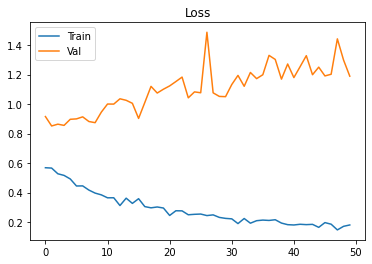

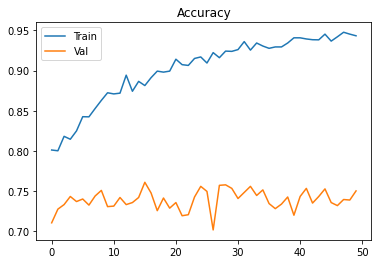

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [ ]:
y_pred=CNNmodel.predict(X_test)
print(y_pred)
print('Confusion_matrix: ',tensorflow.math.confusion_matrix(y_test, np.argmax(y_pred,axis=1)))

62/62 [==============================] - 2s 28ms/step
[[3.5356417e-20 2.7296708e-22 3.3034201e-21 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.4763580e-04 1.2203229e-06 5.4551945e-03 ... 7.0813455e-25
  1.4078499e-21 1.0987170e-20]
 [8.3368152e-02 1.4084530e-07 5.0730001e-02 ... 1.5014204e-34
  5.1064449e-24 5.6669025e-28]
 ...
 [2.6605926e-10 9.9999249e-01 6.6211787e-09 ... 2.3007918e-35
  4.8963134e-29 0.0000000e+00]
 [1.8970277e-03 1.7097370e-06 1.3314114e-02 ... 5.4215299e-19
  4.5721249e-14 1.6712093e-12]
 [1.4201496e-09 2.6382165e-09 4.8874388e-10 ... 1.6526682e-27
  3.3017996e-29 2.9620243e-25]]
Confusion_matrix:  tf.Tensor(
[[153   2  12   2   2   6   7   0   5   9]
 [  2 190   2   0   0   2   0   0   0   2]
 [ 11   0 136   9   2  12   3   3   4  18]
 [  2   1   7 131  15   1   2  14  14  11]
 [  1   0   2   8 151   1   3  11  15   6]
 [  8  18  10   1   1 156   0   0   2   2]
 [  2   0   0   1   4   0 174   0   2  15]
 [  2   0   7  10   6   3   0 153  13   4]
 [  1   

In [ ]:
CNNmodel.save('/content/gdrive/MyDrive/CNNModelMFCCSpectro')

In [ ]:
# Convert the model.
converter = tensorflow.lite.TFLiteConverter.from_keras_model(CNNmodel)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

### Modèle 2

In [ ]:
input_shape=(128,130)
# build network topology
model = keras.Sequential()

# 2 LSTM layers
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.LSTM(64))

# dense layer
model.add(Dense(256,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4)) 
# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 128, 64)           49920     
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 256)               16640     
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 48)               

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
88/88 [==============================] - 32s 315ms/step - loss: 2.2984 - accuracy: 0.1312 - val_loss: 2.2698 - val_accuracy: 0.1907
Epoch 2/50
88/88 [==============================] - 24s 276ms/step - loss: 2.2355 - accuracy: 0.1720 - val_loss: 2.1560 - val_accuracy: 0.1989
Epoch 3/50
88/88 [==============================] - 24s 279ms/step - loss: 2.1494 - accuracy: 0.1930 - val_loss: 2.0633 - val_accuracy: 0.2292
Epoch 4/50
88/88 [==============================] - 23s 266ms/step - loss: 2.0965 - accuracy: 0.2230 - val_loss: 1.9956 - val_accuracy: 0.2771
Epoch 5/50
88/88 [==============================] - 23s 266ms/step - loss: 2.0531 - accuracy: 0.2383 - val_loss: 1.9605 - val_accuracy: 0.2936
Epoch 6/50
88/88 [==============================] - 23s 266ms/step - loss: 2.0237 - accuracy: 0.2498 - val_loss: 1.9269 - val_accuracy: 0.2854
Epoch 7/50
88/88 [==============================] - 24s 274ms/step - loss: 1.9949 - accuracy: 0.2573 - val_loss: 1.9021 - val_accuracy: 0.2929

### Test avec musiques enregistrées

In [ ]:
StrtMin = 1
StrtSec = 0

EndMin = 1
EndSec = 40

# Time to milliseconds conversion
StrtTime = StrtMin*60*1000+StrtSec*1000
EndTime = StrtMin*60*1000+EndSec*1000


In [ ]:
audio = AudioSegment.from_wav('/content/LES JONES - BURGERS-ws3WGmINlIg.wav')
newAudio = audio[StrtTime:EndTime]
newAudio.export('/content/song.wav', format='wav')

for w in range(0,10):
          t1 = 3*(w)*1000
          t2 = 3*(w+1)*1000
          newAudio = AudioSegment.from_wav('/content/song.wav')
          new = newAudio[t1:t2]
          new.export(f'/content/{str(w)}.wav', format='wav')


In [ ]:
classe = []

for i in range(0,10):
  y,sr = librosa.load(f'{str(w)}.wav',duration=3)
  data = np.array([librosa.feature.mfcc(y=y,sr=sr)])


  data = tensorflow.expand_dims(data, axis = -1)
  prediction = CNNmodel.predict(data)
  class_label = np.argmax(prediction)
  print(class_label)
  classe.append(class_label)

moyenne = int(sum(classe)/len(classe))
print(genres_musicaux[moyenne])

1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 38ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 30ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 42ms/step
3
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 27ms/step
3
disco


In [ ]:
print(data.shape)

(1, 128, 130)


In [ ]:
prediction = model.predict(data)

1/1 [==============================] - 0s 33ms/step


In [ ]:
print(prediction)

[[3.9571844e-04 1.5337831e-05 9.0291202e-01 1.5891250e-03 1.7764974e-06
  2.6425194e-02 6.7786814e-08 1.2945203e-03 1.9357152e-02 4.8008982e-02
  2.2062513e-15 2.2069247e-15 1.3043115e-15 6.2772579e-16 9.1770870e-15
  1.3394256e-15 1.4911168e-15 4.3405068e-16 2.6751710e-15 1.8450451e-15
  1.3650471e-14 8.8276344e-16 6.5005289e-16 6.1614163e-15]]


In [ ]:
class_label = np.argmax(prediction)
print(genres_musicaux[class_label])

country
